In [1]:
#Author:Fairuz Shadmani Shishir
#Date:07-08-2019

### In this notebook we analyze spatial the data and plot latitude and longitude on the map.


In [2]:
#import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import os
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as PathEffects
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid.inset_locator import inset_axes

C:\Users\aci\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  del sys.path[0]


### Tutorial_Link https://mohammadimranhasan.com/geospatial-data-mapping-with-python/

In [3]:
#import the dataset

In [4]:
df=pd.read_csv('LocationDataRecoveryApp.csv')

In [5]:
df=df.head(20000)

In [6]:
df.head()

,ID,Userid,Time,ServerTime,Latitude,Longitude,Name
0,487972,14125,2019-06-26 07:32:54.000,2019-06-26 07:32:53.007,23.755856,90.356429,Md. Rezaul Khan
1,487980,16705,2019-06-26 09:30:18.423,2019-06-26 09:33:19.703,23.768413,90.405205,Atikur Rahman
2,1373582,C29337,2019-07-29 06:32:53.000,2019-07-29 18:33:01.147,25.753488,89.251230,Md. Abdul Khalil
3,1373583,16688,2019-07-29 06:32:59.953,2019-07-29 18:33:01.373,23.526900,88.807443,Md. Selim Reza
4,1373584,20663,2019-07-29 06:33:03.000,2019-07-29 18:33:01.630,24.987227,90.038932,Yousuf Ali


### Combine the latitude and longitude into Coordinates column

In [7]:
#df = pd.read_csv(fn_b)
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
sites = gpd.GeoDataFrame(df, geometry='Coordinates')

### import the shape file .you can download this from intenet

In [8]:
#sdir1 = os.path.dirname('BGD_adm2.shp')
#sf = os.path.dirname('natural.shp')
Bangladesh = gpd.read_file('BGD_adm2.shp')
fr = gpd.read_file('natural.shp')

In [9]:
Bangladesh

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,20,BGD,Bangladesh,1,Barisal,1,Barisal,Zila,District,None,None,(POLYGON ((90.43000030517578 22.50138854980474...
1,20,BGD,Bangladesh,1,Barisal,2,Bhola,Zila,District,None,None,(POLYGON ((90.59583282470732 21.73779106140142...
2,20,BGD,Bangladesh,1,Barisal,3,Borgona,Zila,District,None,Barguna|Borgona,(POLYGON ((90.10385894775391 21.87963104248058...
3,20,BGD,Bangladesh,1,Barisal,4,Jhalakati,Zila,District,None,Jhalakati|Jhalakhati|Jhalkathi,"(POLYGON ((90.2980575561524 22.66250038146973,..."
4,20,BGD,Bangladesh,1,Barisal,5,Patuakhali,Zila,District,None,None,"(POLYGON ((90.4698562622072 21.77989959716791,..."
5,20,BGD,Bangladesh,1,Barisal,6,Pirojpur,Zila,District,None,None,(POLYGON ((89.90277862548845 22.36805534362804...
6,20,BGD,Bangladesh,2,Chittagong,7,Bandarbon,Zila,District,None,Bandarban|Bandarbon,"POLYGON ((92.18321228027361 22.37404060363781,..."
7,20,BGD,Bangladesh,2,Chittagong,8,Brahmanbaria,Zila,District,None,None,"POLYGON ((91.32498931884788 24.23588180542004,..."
8,20,BGD,Bangladesh,2,Chittagong,9,Chandpur,Zila,District,None,None,(POLYGON ((90.63471984863304 23.15222358703619...
9,20,BGD,Bangladesh,2,Chittagong,10,Chittagong,Zila,District,None,Chittagong|Chitagongue,(POLYGON ((91.44917297363287 22.61639022827148...


In [10]:
type(Bangladesh)

geopandas.geodataframe.GeoDataFrame

In [19]:
cln = 'NAME_2'
#cln = 'NAME_1'
#std_a = ['Shatkhira', 'Khulna','Bagerhat', 'Jessore', 'Narail', 'Gopalgonj','Pirojpur']
#std_a = ['Barisal', 'Chittagong','Dhaka', 'Khulna', 'Rajshahi', 'Rangpur','Sylhet']
#ids = [np.where(Bangladesh[cln]==nm)[0] for nm in std_a]
#ids = np.hstack(ids)

### Now we plot the all divisions of  Bangladesh

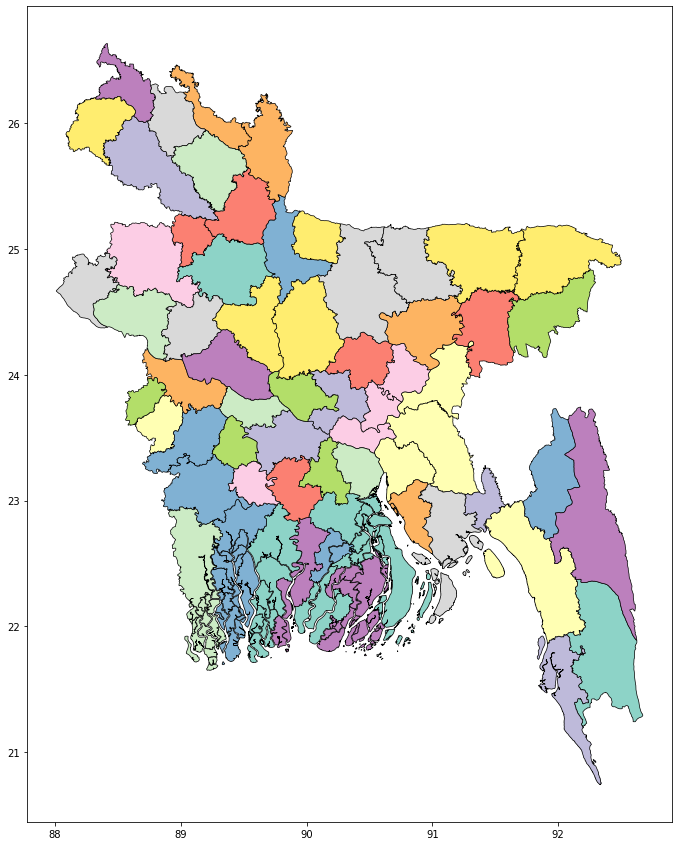

In [20]:
studyar = Bangladesh.iloc[:,:]
std_a1=studyar.plot(figsize=(15,15),column=cln, cmap='Set3', edgecolor='k', lw=0.7)

### now we plot our datapoints on map

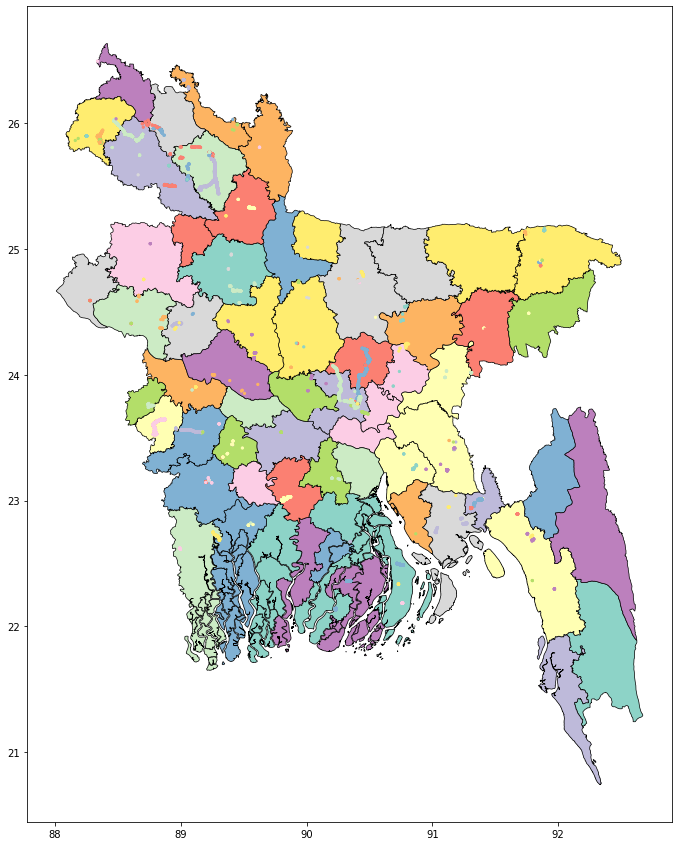

In [22]:
a='Name'
studyar = Bangladesh.iloc[:,:]
std_a1=studyar.plot(figsize=(15,15),column=cln, cmap='Set3', edgecolor='k', lw=0.7)
csm = sites.plot(a,ax=std_a1, cmap='Set3', markersize=5)

### finally we label our map by district

(20, 27)

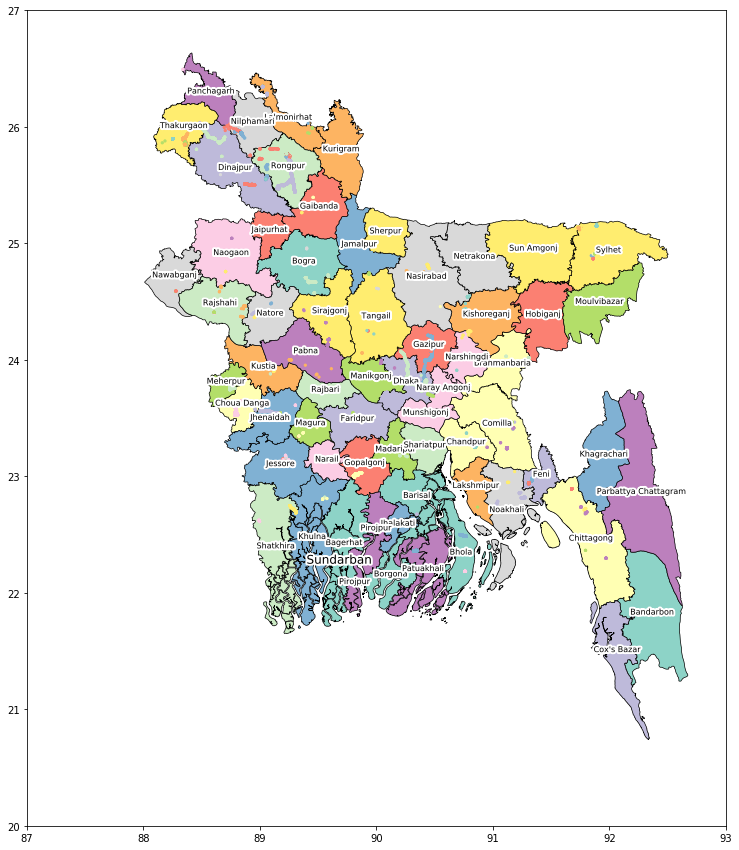

In [23]:
a='Name'
studyar = Bangladesh.iloc[:,:]
std_a1=studyar.plot(figsize=(15,15),column=cln, cmap='Set3', edgecolor='k', lw=0.7)
csm = sites.plot(a,ax=std_a1, cmap='Set3', markersize=5)

tx1 = plt.text(x=89.4, y=22.25, s='Sundarban', fontsize=12)
tx1.set_path_effects([PathEffects.withStroke(linewidth=4, foreground='w')])
for idx, row in studyar.iterrows():
    fnt = 10
    txt=plt.annotate(s=row[cln], xy=(studyar.geometry.centroid.x[idx],studyar.geometry.centroid.y[idx]),
                 horizontalalignment='center', fontsize=8, wrap=True, color='k')
    txt.set_path_effects([PathEffects.withStroke(linewidth=4, foreground='w')])
plt.xlim(87, 93)
plt.ylim(20, 27)